# <font color = #32CD32> Part 1: Import Libraries and Dataset. Initial Understanding of the Data </font>

### 1.1. Import Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn
sns.set_palette("muted")
from scipy import stats
from random import randint

warnings.filterwarnings("ignore")

### 1.2. Read and Initially Understand Each Dataset

### <h2 style="background-color:white; color:#32CD32; text-align:center;"><strong><centre>Cab DataFrame </centre></strong></h2>

### <h2>  <font color = #90EE90> Import Data </font> </h2>

In [2]:
cab_df = pd.read_csv('DataSets-main/Cab_Data.csv')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### <h2>  <font color = #90EE90> Data Info </font> </h2>

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### We need to change the type of `Data of Travel` Column

In [4]:
cab_data_list = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')

converted_dates = [base_date + pd.DateOffset(date_offset) for date_offset in cab_data_list]
cab_df['Date of Travel'] = pd.to_datetime(converted_dates, format="%Y/%m/%d")

### <h2>  <font color = #90EE90> Data Type </font> </h2>

In [5]:
cab_df.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

### <h2>  <font color = #90EE90> Data Description </font> </h2>

In [6]:
cab_df.drop(columns=['Date of Travel']).describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


### <h2>  <font color = #90EE90> Company Col </font> </h2>

In [7]:
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

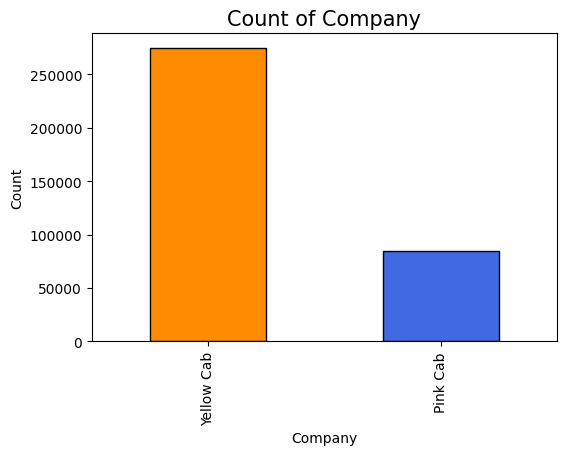

In [8]:
plt.figure(figsize=(6,4))
my_pal = ["DarkOrange", "RoyalBlue"]
cab_df['Company'].value_counts().plot(kind='bar', edgecolor='black', color=my_pal)
plt.title('Count of Company', fontsize=15)
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

> #### __Company__: The dataset is dominated by 'Yellow Cab'.

### <h2>  <font color = #90EE90> City Column </font> </h2>

In [9]:
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

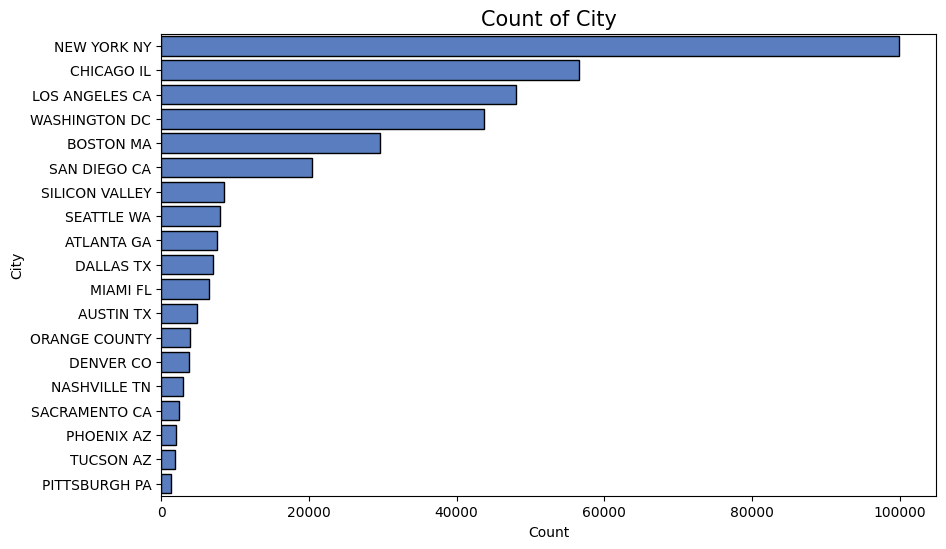

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y=cab_df['City'], order=cab_df['City'].value_counts().index, edgecolor='black')
plt.title('Count of City', fontsize=15)
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

> #### __City__: New York has the highest number of transactions.

### <h2>  <font color = #90EE90> Distributions of Columns </font> </h2>

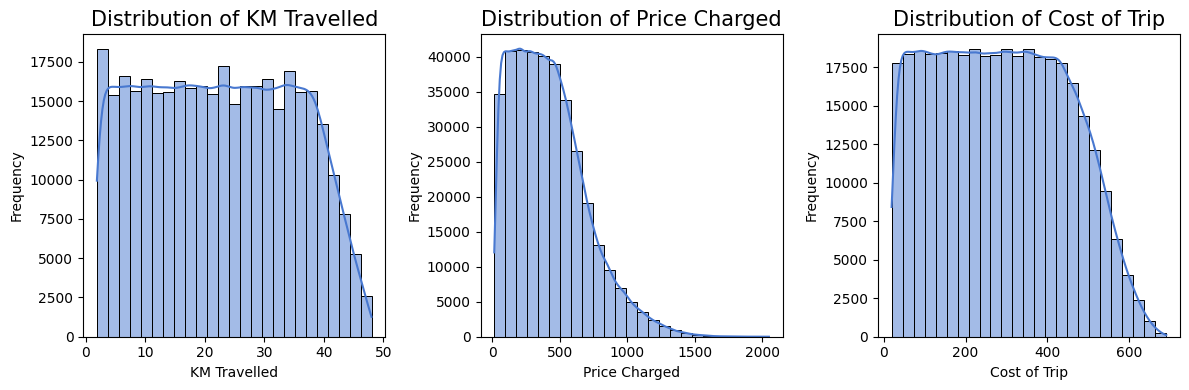

In [11]:
columns_to_plot = cab_df.drop(columns=['Transaction ID', 'Date of Travel', 'City', 'Company']).columns

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(cab_df[col], ax=axes[i], kde=True, bins=25)
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

> #### __KM Travelled__: Most of the rides varies from 2 to 48 KM, indicating most trips are short.
> #### __Price Charged__ and __Cost of Trip__: Indicating a consistent pricing model.

### <h2 style="background-color:white; color:#32CD32; text-align:center;"><strong><centre>City DataFrame </centre></strong></h2>

### <h2>  <font color = #90EE90> Import Data </font> </h2>

In [12]:
city_df = pd.read_csv('DataSets-main/City.csv')
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### <h2>  <font color = #90EE90> Data Info </font> </h2>

In [13]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


#### We need to change the type of `Population and Users` Columns

In [14]:
# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',', '') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',', '') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

### <h2>  <font color = #90EE90> Data Type </font> </h2>

In [15]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

### <h2> <font color = #90EE90> Data Description </font> </h2>

In [16]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### <h2>  <font color = #90EE90> Distributions of Columns </font> </h2>

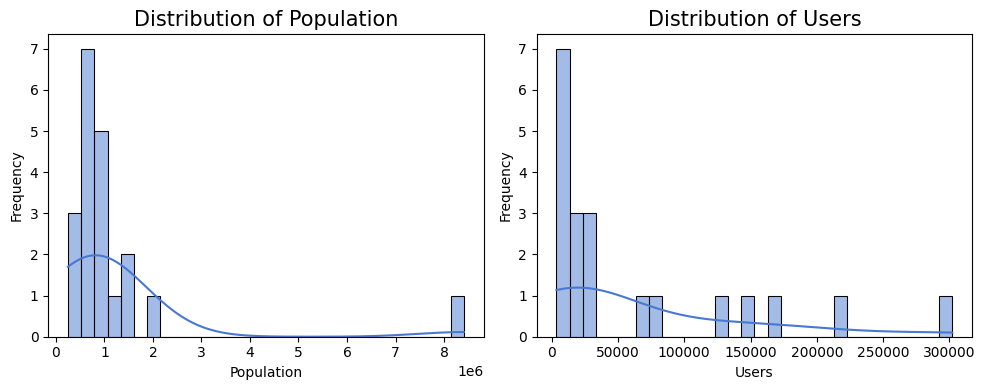

In [17]:
columns_to_plot = city_df.drop(columns=['City']).columns

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(city_df[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

> #### __Population__ and __Users__: Population and Users show large values in certain cities, likely due to major urban centers.

### <h2 style="background-color:white; color:#32CD32; text-align:center;"><strong><centre>Customer ID DataFrame </centre></strong></h2>

### <h2> <font color = #90EE90> Import Data </font> </h2>

In [18]:
customer_id_df = pd.read_csv('DataSets-main/Customer_ID.csv')
customer_id_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### <h2>  <font color = #90EE90> Data Info </font> </h2>

In [19]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### <h2> <font color = #90EE90> Data Description </font> </h2>

In [20]:
customer_id_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### <h2> <font color = #90EE90> Gender Column </font> </h2>

In [21]:
customer_id_df['Gender'].describe()

count     49171
unique        2
top        Male
freq      26562
Name: Gender, dtype: object

### <h2> <font color = #90EE90> Distributions of Columns </font> </h2>

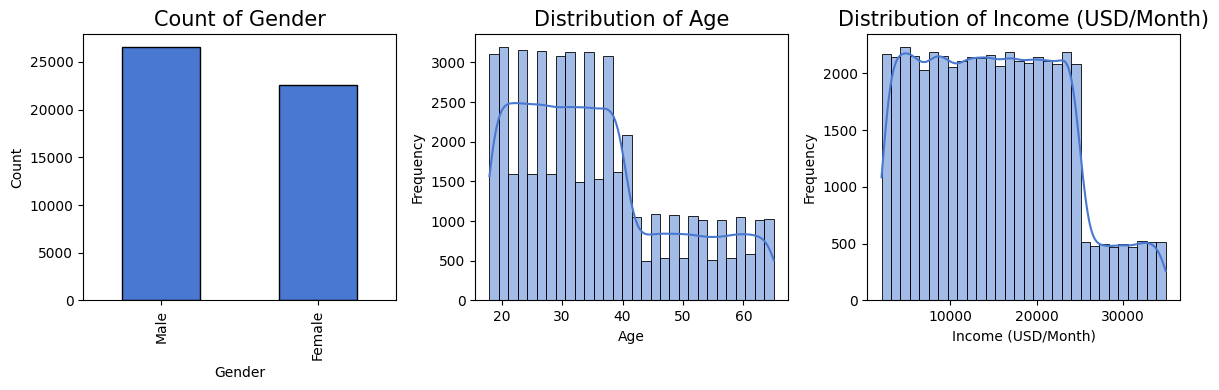

In [22]:
columns_to_plot = customer_id_df.drop(columns=['Customer ID']).columns

# Create the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    if col == 'Gender':
        customer_id_df['Gender'].value_counts().plot(kind='bar', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Count of {col}' , fontsize=15)
        axes[i].set_xlabel('Gender')
        axes[i].set_ylabel('Count')

    else:
        sns.histplot(customer_id_df[col], ax=axes[i], kde=True, bins=30)
        axes[i].set_title(f'Distribution of {col}', fontsize=15)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

> #### __Gender__: The number of male customers is higher than female customers.
> #### __Age__: The customer ages show a relatively normal distribution with a slight right skew. (average age - 35)
> #### __Income__: The income distribution is right-skewed, with most customers earning less than $20,000 per month.

### <h3 style="background-color:white; color:#32CD32; text-align:center;"><strong><centre>Transaction ID DataFrame </centre></strong></h3>

### <h2> <font color = #90EE90> Import Data </font> </h2>

In [23]:
transaction_df = pd.read_csv('DataSets-main/Transaction_ID.csv')
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### <h2> <font color = #90EE90> Data Info </font> </h2>

In [24]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### <h2> <font color = #90EE90> Data Description </font> </h2>

In [25]:
transaction_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


###  <h2> <font color = #90EE90> Payment Mode Column </font> </h2>

In [26]:
transaction_df['Payment_Mode'].describe()

count     440098
unique         2
top         Card
freq      263991
Name: Payment_Mode, dtype: object

### <h2> <font color = #90EE90> Distributions of Columns </font> </h2>

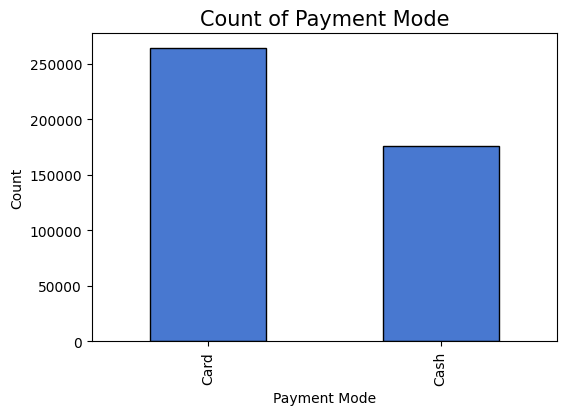

In [27]:
plt.figure(figsize=(6,4))
transaction_df['Payment_Mode'].value_counts().plot(kind='bar', edgecolor='black')
plt.title(f'Count of Payment Mode', fontsize=15)
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

> #### __Payment Mode__: Card payments are more common than cash payments.

# <font color = #32CD32> Part 2: Merge the Whole Dataset. Check for Missing Values and Correlation. </font>

### 2.1. Merge all Dataframes together

In [28]:
df = cab_df.merge(transaction_df, how='left', on='Transaction ID').merge(customer_id_df, how='left', on='Customer ID').merge(city_df, how='left', on='City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


In [29]:
# Check for missing values
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### 2.2. Check the Correlation

In [30]:
# Calculate the correlation matrix
data_corr = df.drop(columns=['Company', 'City', 'Payment_Mode', 'Gender']).corr()

In [31]:
# take lower correlation matrix
matrix = np.triu(data_corr)

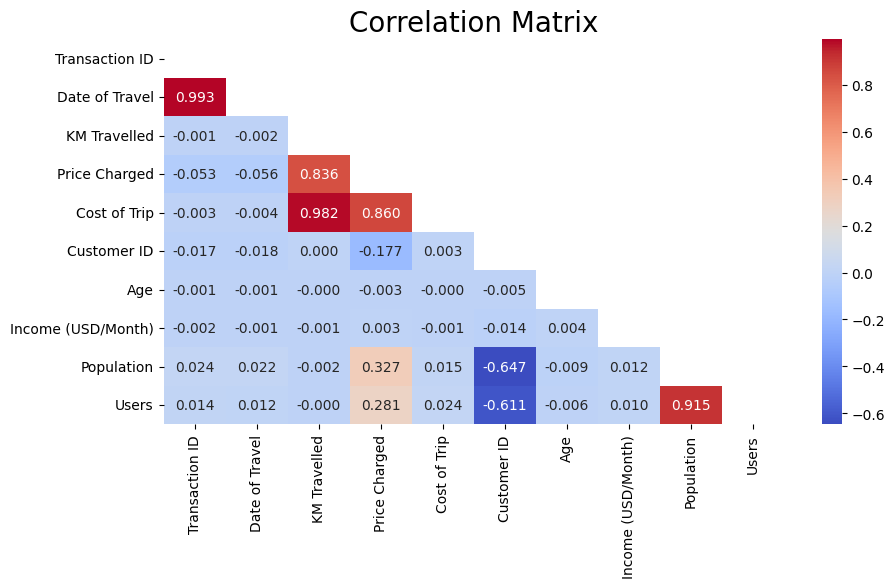

In [32]:
# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data_corr, mask=matrix, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

> #### <b> As we can see there is strong positive Correlation between: </b>   <br> ◉ Population vs Users   <br> ◉ Price Charged vs Cost of Trip vs KM Travelled   <br> ◉ Date of Travel vs Transaction ID


# <font color = #32CD32> Part 3: Investigate the Data (Deep EDA) </font>

In [33]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


In [34]:
# Extract month and year from 'Date of Travel'
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day_of_week

### <h2> <font color = #90EE90> 3.1. __Overall Indicators__: </font> </h2>

In [35]:
# Grouping of data by companies and calculation of key indicators
total_revenue = df.groupby('Company')['Price Charged'].sum()
total_cost = df.groupby('Company')['Cost of Trip'].sum()
total_trips = df.groupby('Company')['Transaction ID'].count()
total_profit = total_revenue - total_cost

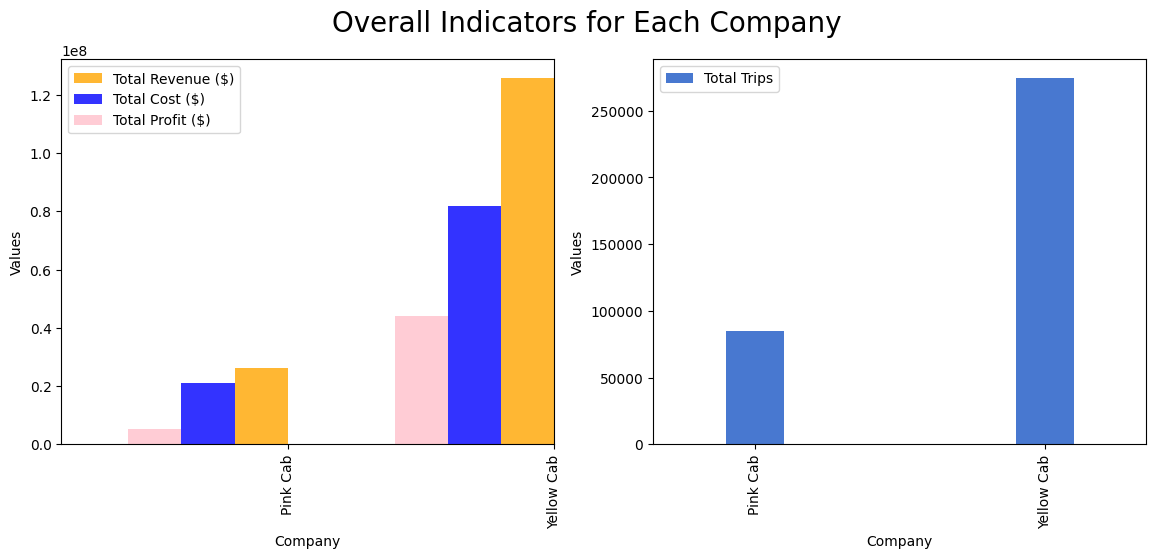

In [36]:
# Plotting indicators
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

total_revenue.plot(kind='bar', ax=ax[0], color='orange', alpha=0.8, position=1, width=0.2, label='Total Revenue ($)')
total_cost.plot(kind='bar', ax=ax[0],  color='blue', alpha=0.8, position=2, width=0.2, label='Total Cost ($)')
total_profit.plot(kind='bar', ax=ax[0],  color='pink', alpha=0.8, position=3, width=0.2, label='Total Profit ($)')

plt.suptitle('Overall Indicators for Each Company', fontsize=20)
ax[0].set_ylabel('Values')
ax[0].legend()

total_trips.plot(kind='bar', ax=ax[1],  width=0.2, label='Total Trips')
ax[1].set_ylabel('Values')
ax[1].legend()
plt.show()

> #### `Yellow Cab` is clearly superior to the Pink Cab in all key indicators.

### <h2> <font color = #90EE90> 3.2. __Profitability analysis__:  </font> </h2>

### <h2> <font color = #90EE90> Average Revenue, Costs and Profit per Trip </font> </h2>

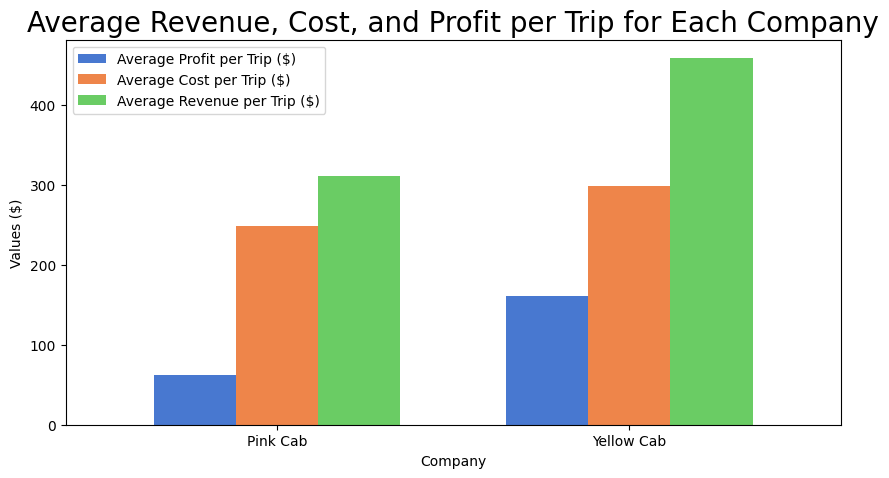

In [37]:
# Calculation of average values
average_revenue_per_trip = df.groupby('Company')['Price Charged'].mean()
average_cost_per_trip = df.groupby('Company')['Cost of Trip'].mean()
average_profit_per_trip = average_revenue_per_trip - average_cost_per_trip

# Creating a Data Frame with calculated values
summary_df = pd.DataFrame({
    'Average Profit per Trip ($)': average_profit_per_trip,
    'Average Cost per Trip ($)': average_cost_per_trip,
    'Average Revenue per Trip ($)': average_revenue_per_trip
})

# Plotting
summary_df.plot(kind='bar', figsize=(10, 5), width=0.7)

plt.title('Average Revenue, Cost, and Profit per Trip for Each Company', fontsize=20)
plt.ylabel('Values ($)')
plt.xticks(rotation=0)  # Removing the slope of the labels along the X axis
plt.show()

* > #### The average revenue per trip for Y`Yellow Cab` ($458.18) is higher than for Pink Cab ($310.80).
* > #### The average cost per trip for `Yellow Cab` ($297.92) is also higher than for Pink Cab ($248.15).
* > #### The average profit per trip for `Yellow Cab` ($160.26) significantly exceeds Pink's profit Cab ($62.65).

> #### These data indicate that `Yellow Cab` provides a higher Profit on each trip, despite the higher costs.


### <h2> <font color = #90EE90> Profit Per Trip by Gender in Companies</font> </h2>

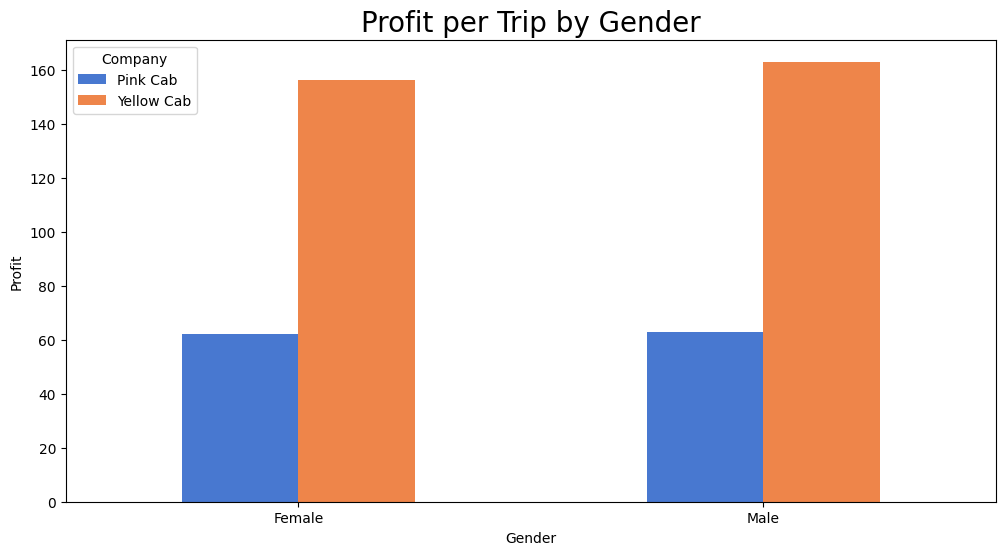

In [104]:
df.groupby(['Gender', 'Company'])['Profit'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Profit per Trip by Gender', fontsize=20)
plt.xlabel('Gender')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

> #### There is no difference in Profit Per Trip by Gender (hypothesis 1)

### <h2> <font color = #90EE90> Profit Per Trip by Paymet Mode</font> </h2>

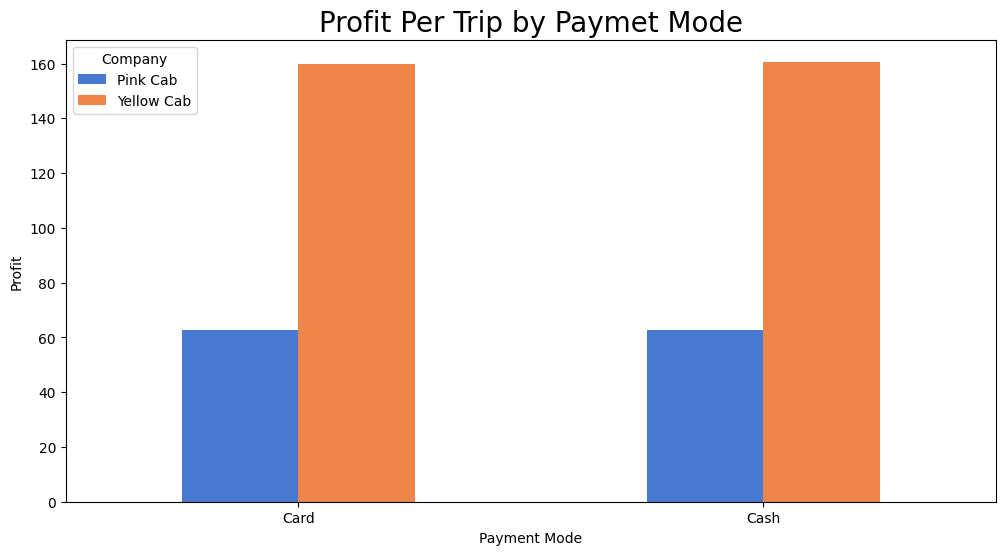

In [ ]:
df.groupby(['Payment_Mode', 'Company'])['Profit'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Profit Per Trip by Paymet Mode', fontsize=20)
plt.xlabel('Payment Mode')
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

> #### There is no difference in Profit Per Trip by Payment Mode (hypothesis 2)

### <h2> <font color = #90EE90> Prices Charged by Company </font> </h2>

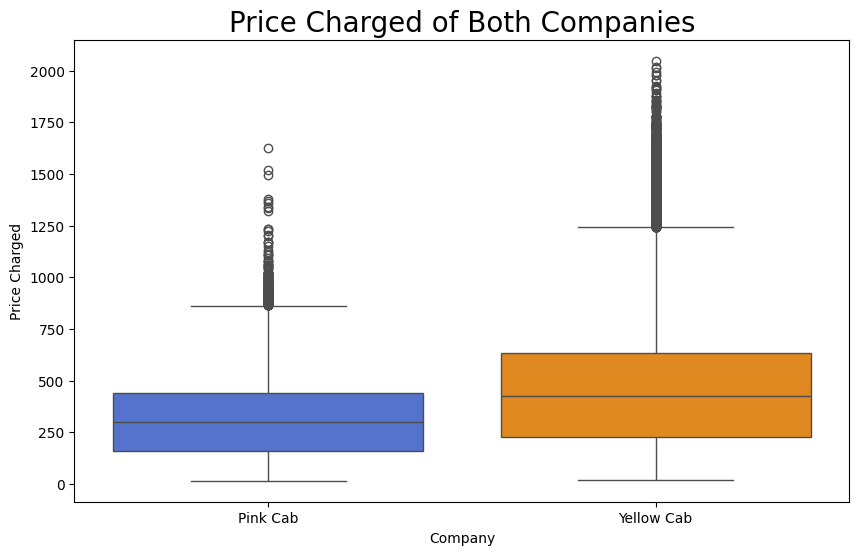

In [38]:
plt.figure(figsize = (10, 6))
my_pal = {"Yellow Cab": "DarkOrange", "Pink Cab": "RoyalBlue"}
sns.boxplot(x=df['Company'], y=df['Price Charged'], palette=my_pal)
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

In [39]:
df.groupby(['Company'])['Price Charged'].median()

Company
Pink Cab      298.06
Yellow Cab    425.06
Name: Price Charged, dtype: float64

> #### As we can see Prices Charged of `Yellow Cab` in generall is higher than of Pink Cab (median values $425 vs $298).

### <h2> <font color = #90EE90> Price Charged Per Trip by Age Group</font> </h2>

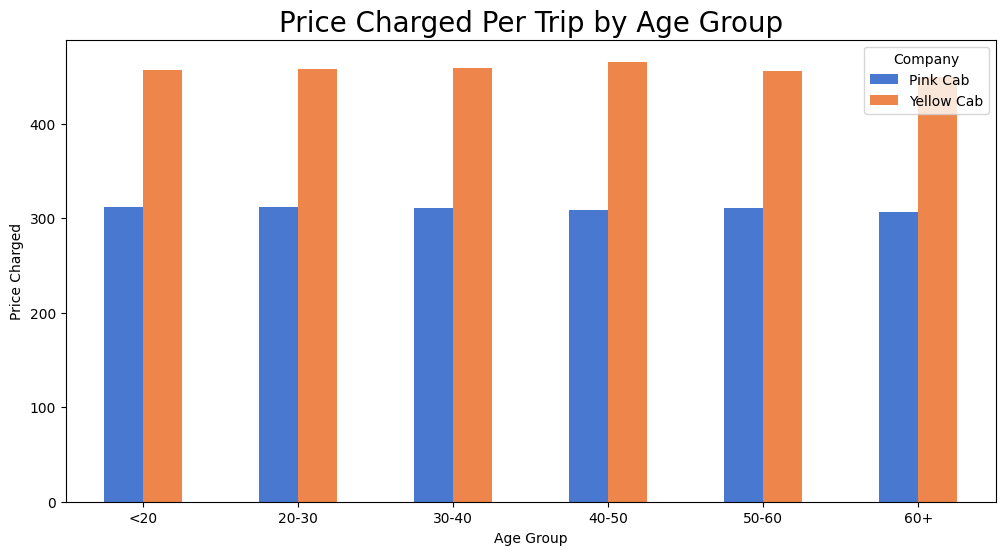

In [ ]:
df.groupby(['Age Group', 'Company'])['Price Charged'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Price Charged Per Trip by Age Group', fontsize=20)
plt.xlabel('Age Group')
plt.ylabel('Price Charged')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

> #### There is no difference between Price Charged Per Trip by Age Group (hypothesis 3)

### <h2> <font color = #90EE90> Price Charged vs Distance </font> </h2>

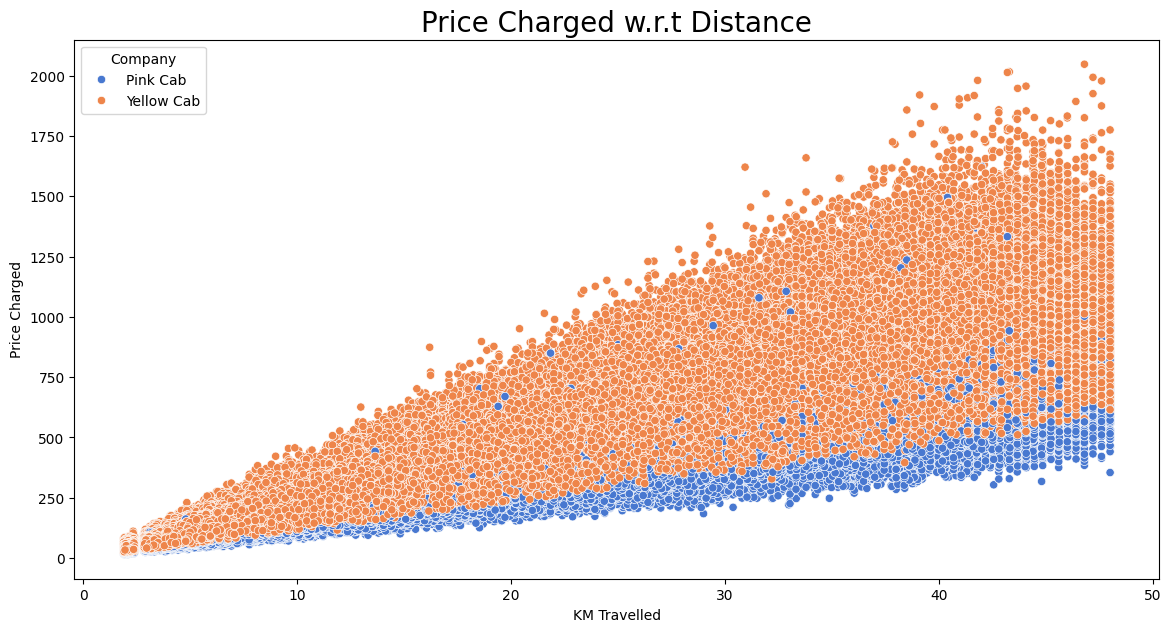

In [40]:
plt.figure(figsize = (14, 7))
sns.scatterplot(data=df, x='KM Travelled', y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged')
plt.xlabel('KM Travelled')
plt.show()

> #### As we can see there is a `linear relationship` between KM traveled and Price Charged as we expected. However, Yellow Cab has high charges compared to Pink Cab.

### <h2> <font color = #90EE90> Seasonal trends </font> </h2>

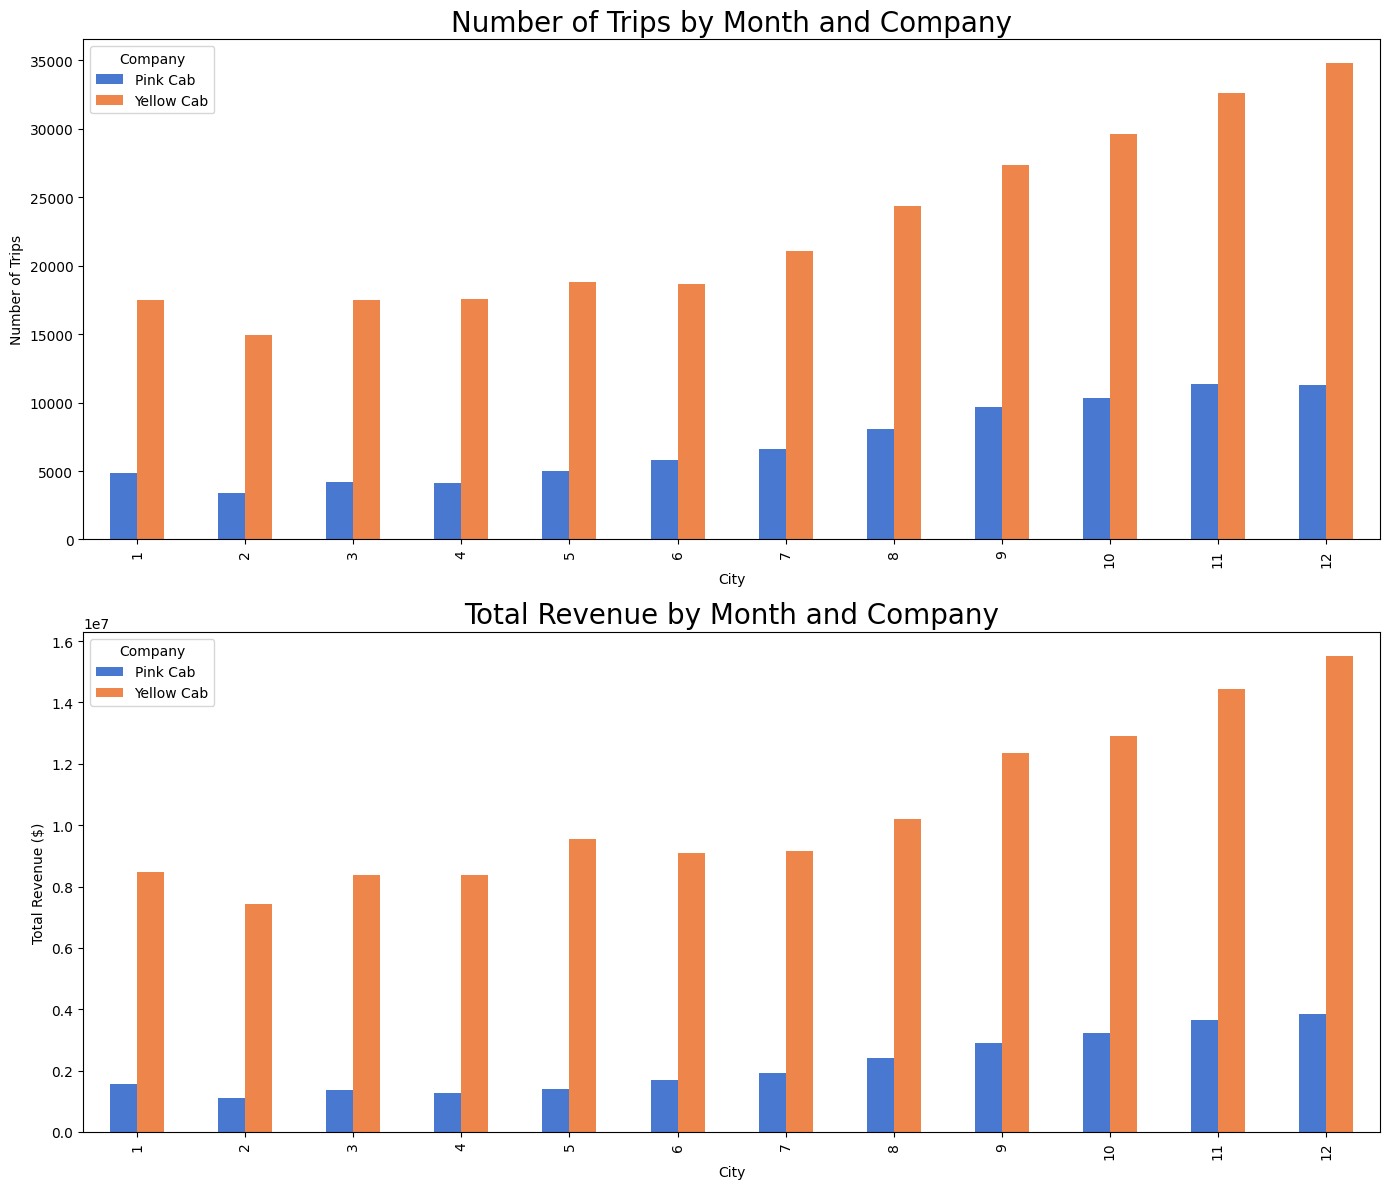

In [41]:
# Grouping data by month and company
month_trips = df.groupby(['Month', 'Company'])['Transaction ID'].count().unstack()
month_revenue = df.groupby(['Month', 'Company'])['Price Charged'].sum().unstack()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

month_trips.plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Trips by Month and Company', fontsize=20)
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('City')

# Plotting revenue by city
month_revenue.plot(kind='bar', ax=ax[1])
ax[1].set_title('Total Revenue by Month and Company', fontsize=20)
ax[1].set_ylabel('Total Revenue ($)')
ax[1].set_xlabel('City')

plt.tight_layout()
plt.show()

> #### Both companies show seasonal fluctuations with certain peaks and troughs at different times of the year. However, the `Yellow Cab` shows more stable growth compared to the Pink Cab.
> #### The revenue of both companies also shows seasonal fluctuations. `Yellow Cab` has higher revenue indicators during the year.

### <h2> <font color = #90EE90> Profit per Month </font> </h2>

In [42]:
# Compute profit per each trip
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

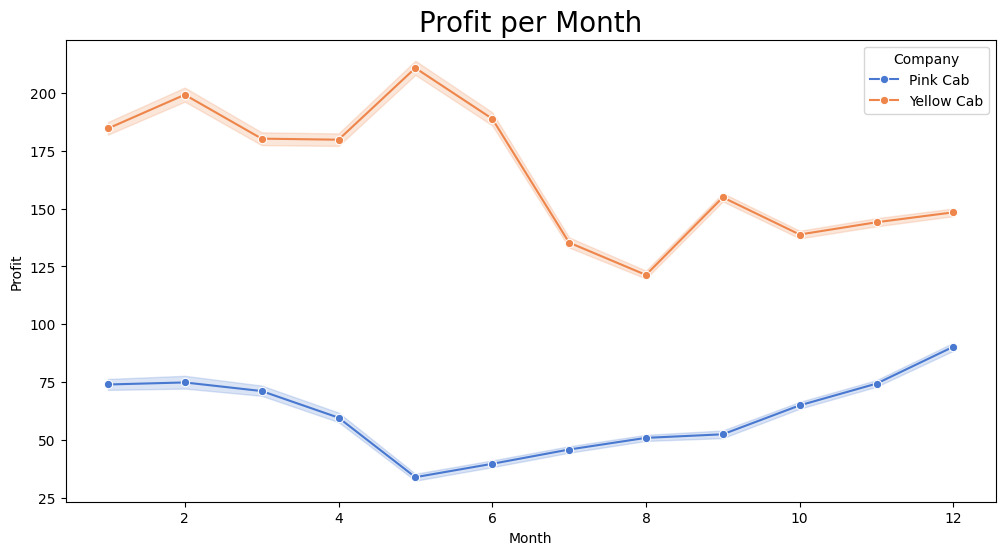

In [43]:
plt.figure(figsize = (12, 6))
sns.lineplot(data=df, x='Month', y='Profit', hue='Company', marker='o')
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Profit per Month", fontsize=20)
plt.show()

> #### The profit margin `varies` w.r.t month

### <h2> <font color = #90EE90> 3.3. __Customer base analysis__: </font> </h2>

### <h2> <font color = #90EE90> Users travel </font> </h2>

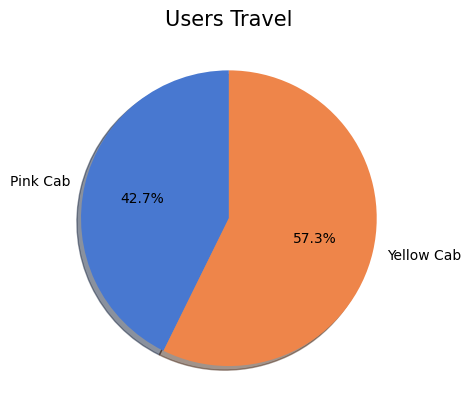

In [44]:
df.groupby('Company')['Users'].mean().plot(kind='pie', shadow=True, autopct='%1.1f%%', startangle=90,)
plt.title('Users Travel', fontsize = 15)
plt.axis('off')
plt.show()

> #### Users are more likely ride by `Yellow cab` more than by Pink Cab.

### <h2> <font color = #90EE90> Distribution of Customer Income by Company </font> </h2>

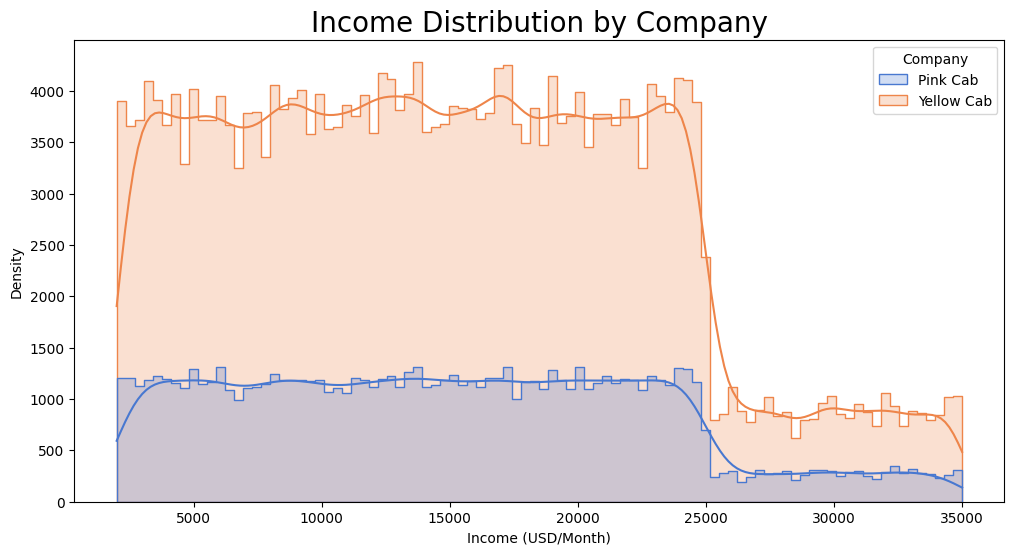

In [45]:
# Plot the income distribution for each company
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Income (USD/Month)', hue='Company', kde=True, element='step')
plt.title('Income Distribution by Company', fontsize=20)
plt.xlabel('Income (USD/Month)')
plt.ylabel('Density')
plt.show()

> #### The income distribution by company shows that both companies serve customers across a wide range of income levels.

### <h2> <font color = #90EE90> Average Income of Customers </font> </h2>

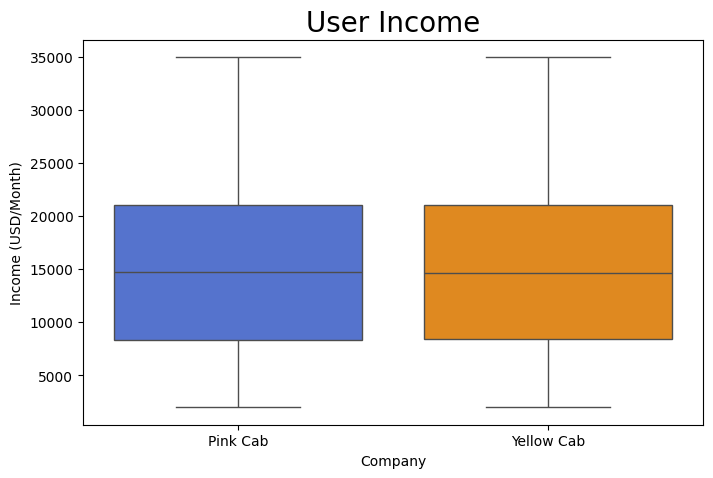

In [46]:
plt.figure(figsize = (8, 5))
my_pal = {"Yellow Cab": "DarkOrange", "Pink Cab": "RoyalBlue"}
sns.boxplot(x=df['Company'], y=df['Income (USD/Month)'], palette=my_pal)
plt.title('User Income', fontsize=20)
plt.show()

In [70]:
df.groupby(['Company'])['Income (USD/Month)'].mean()

Company
Pink Cab      15059.047137
Yellow Cab    15045.669817
Name: Income (USD/Month), dtype: float64

> #### The income of the clients of both companies varies widely, but the median income of `Yellow Cab` (15059.05$) customers is slightly less compared to Pink Cab (15045.66$).

### <h2> <font color = #90EE90> Payment Mode in both Companies </font> </h2>

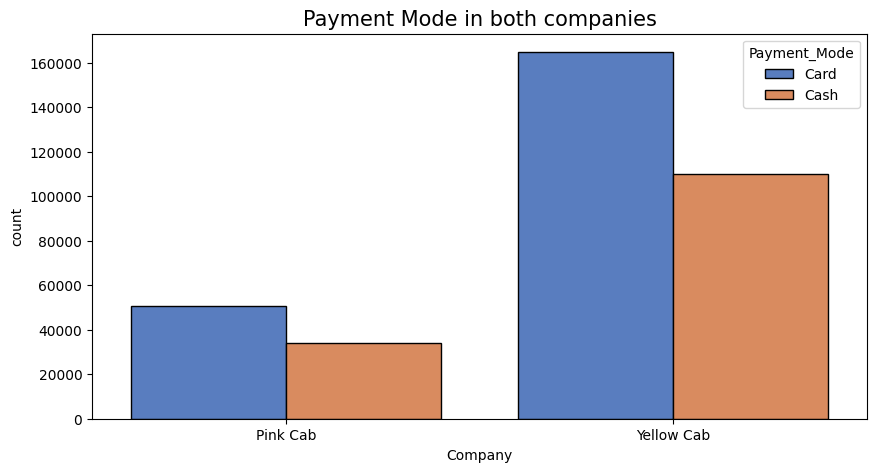

In [47]:
plt.figure(figsize = (10, 5))
sns.countplot(x="Company", hue="Payment_Mode", edgecolor='black',  data=df)
plt.title('Payment Mode in both companies', fontsize=15)
plt.show()

> #### Both payment methods (cash and card) are used in both companies, however, the use of Yellow Cab cards is significantly higher compared to Pink Cab.
> #### Pink Cab has a more even distribution between cash and cards.

### <h2> <font color = #90EE90> Distance Travelled by Age Groups </font> </h2>

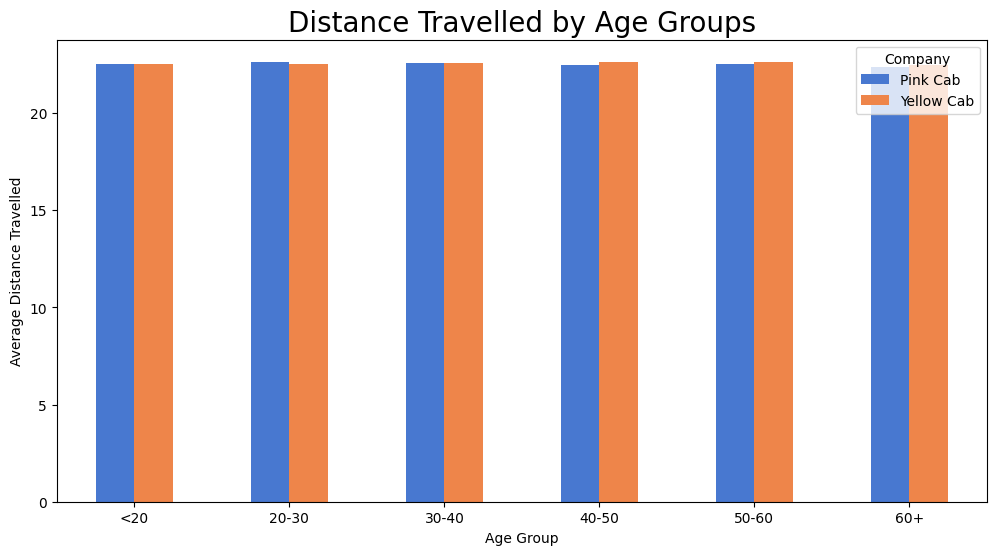

In [99]:
df.groupby(['Age Group', 'Company'])['KM Travelled'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Distance Travelled by Age Groups', fontsize=20)
plt.xlabel('Age Group')
plt.ylabel('Average Distance Travelled')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()

> #### There is no diiference in Distance Travelled between Age Groups in companies.

### <h2> <font color = #90EE90> Distribution of Clients by Age </font> </h2>

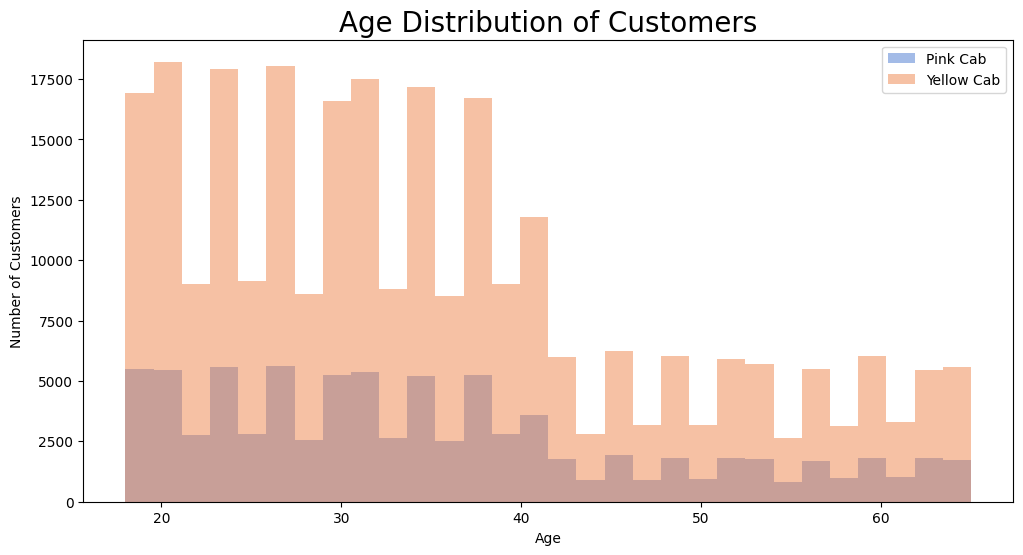

In [48]:
# Plotting the age distribution
plt.figure(figsize=(12, 6))

df[df['Company'] == 'Pink Cab']['Age'].plot(kind='hist', bins=30, alpha=0.5, label='Pink Cab')
df[df['Company'] == 'Yellow Cab']['Age'].plot(kind='hist', bins=30, alpha=0.5, label='Yellow Cab')

plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend()

plt.show()

> #### The age groups of clients are similar for both companies.
> #### The majority of clients are between the ages of 20 and 40.

### <h2> <font color = #90EE90> Average Age of Users </font> </h2>

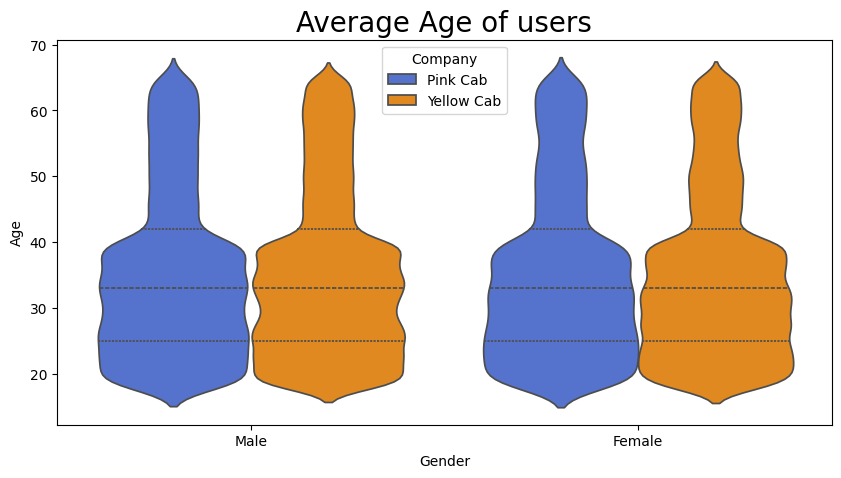

In [49]:
plt.figure(figsize = (10, 5))
my_pal = {"Yellow Cab": "DarkOrange", "Pink Cab": "RoyalBlue"}
sns.violinplot(x=df['Gender'], y=df['Age'], hue = df['Company'], palette = my_pal, inner = 'quartiles')
plt.title('Average Age of users', fontsize=20)
plt.show()

> #### As we can see `35` - is an average Age of Female and Male who use Cab services

### <h2> <font color = #90EE90> Distribution of Clients by Gender </font> </h2>

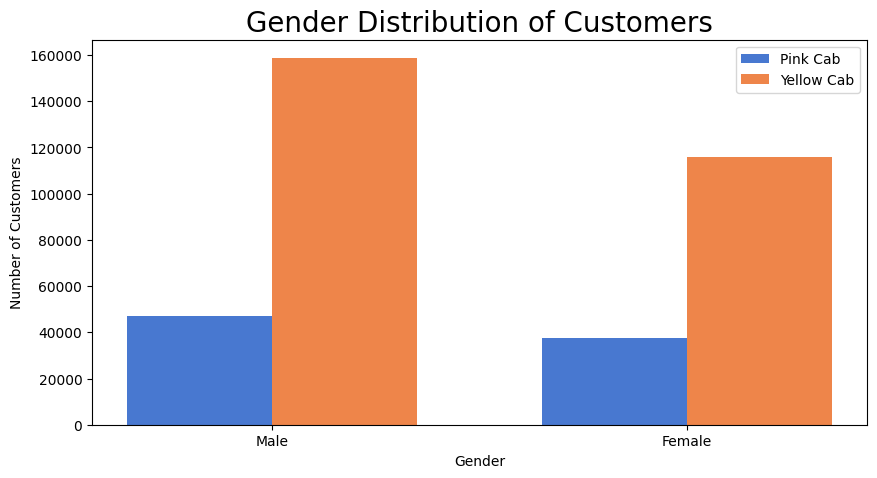

In [50]:
# Plotting the gender distribution
fig, ax = plt.subplots(figsize=(10, 5))

# Create a series for the number of customers by gender for each company
pink_cab_gender = df[df['Company'] == 'Pink Cab']['Gender'].value_counts()
yellow_cab_gender = df[df['Company'] == 'Yellow Cab']['Gender'].value_counts()

# Defining column positions
ind = [0, 1]  # Place for two categories 'Male' and 'Female'
width = 0.35  # Column width

# Building a bar graph
ax.bar(ind, pink_cab_gender, width, label='Pink Cab')
ax.bar([i + width for i in ind], yellow_cab_gender, width, label='Yellow Cab')


ax.set_title('Gender Distribution of Customers', fontsize=20)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Customers')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(['Male', 'Female'])
ax.legend()

plt.show()

> #### The ratio of men and women is similar, with a slight predominance of men.

### <h2> <font color = #90EE90> Share of Cab Users among the total Population by City </font> </h2>

In [51]:
population_by_city = df.groupby(['City'])['Population'].mean().astype(int).reset_index()
users_by_city = df.groupby(['City'])['Users'].mean().astype(int).reset_index()
share_of_users = round(users_by_city['Users'] / population_by_city['Population'] * 100, 3)

df['Share_of_users'] = round(users_by_city['Users'] / population_by_city['Population'] * 100, 3)

In [52]:
# Get the list of random color
colors = []
n = 19

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

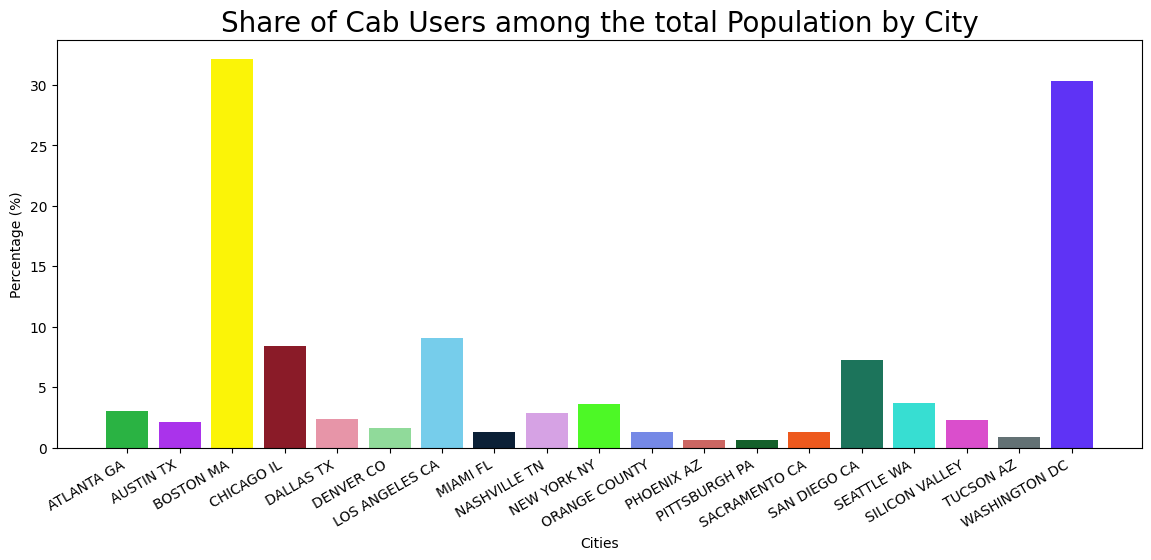

In [53]:
plt.figure(figsize = (14, 6))
plt.bar(users_by_city['City'], share_of_users, color=colors)
plt.gcf().autofmt_xdate()
plt.title('Share of Cab Users among the total Population by City', fontsize=20)
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

> #### As we can see in cities `Washington` and `Boston` more than 30% of population use Cab services

### <h2> <font color = #90EE90> 3.4. __Geographical analysis__: </font> </h2>

### <h2> <font color = #90EE90> Number of Trips and Revenue by City </font> </h2>

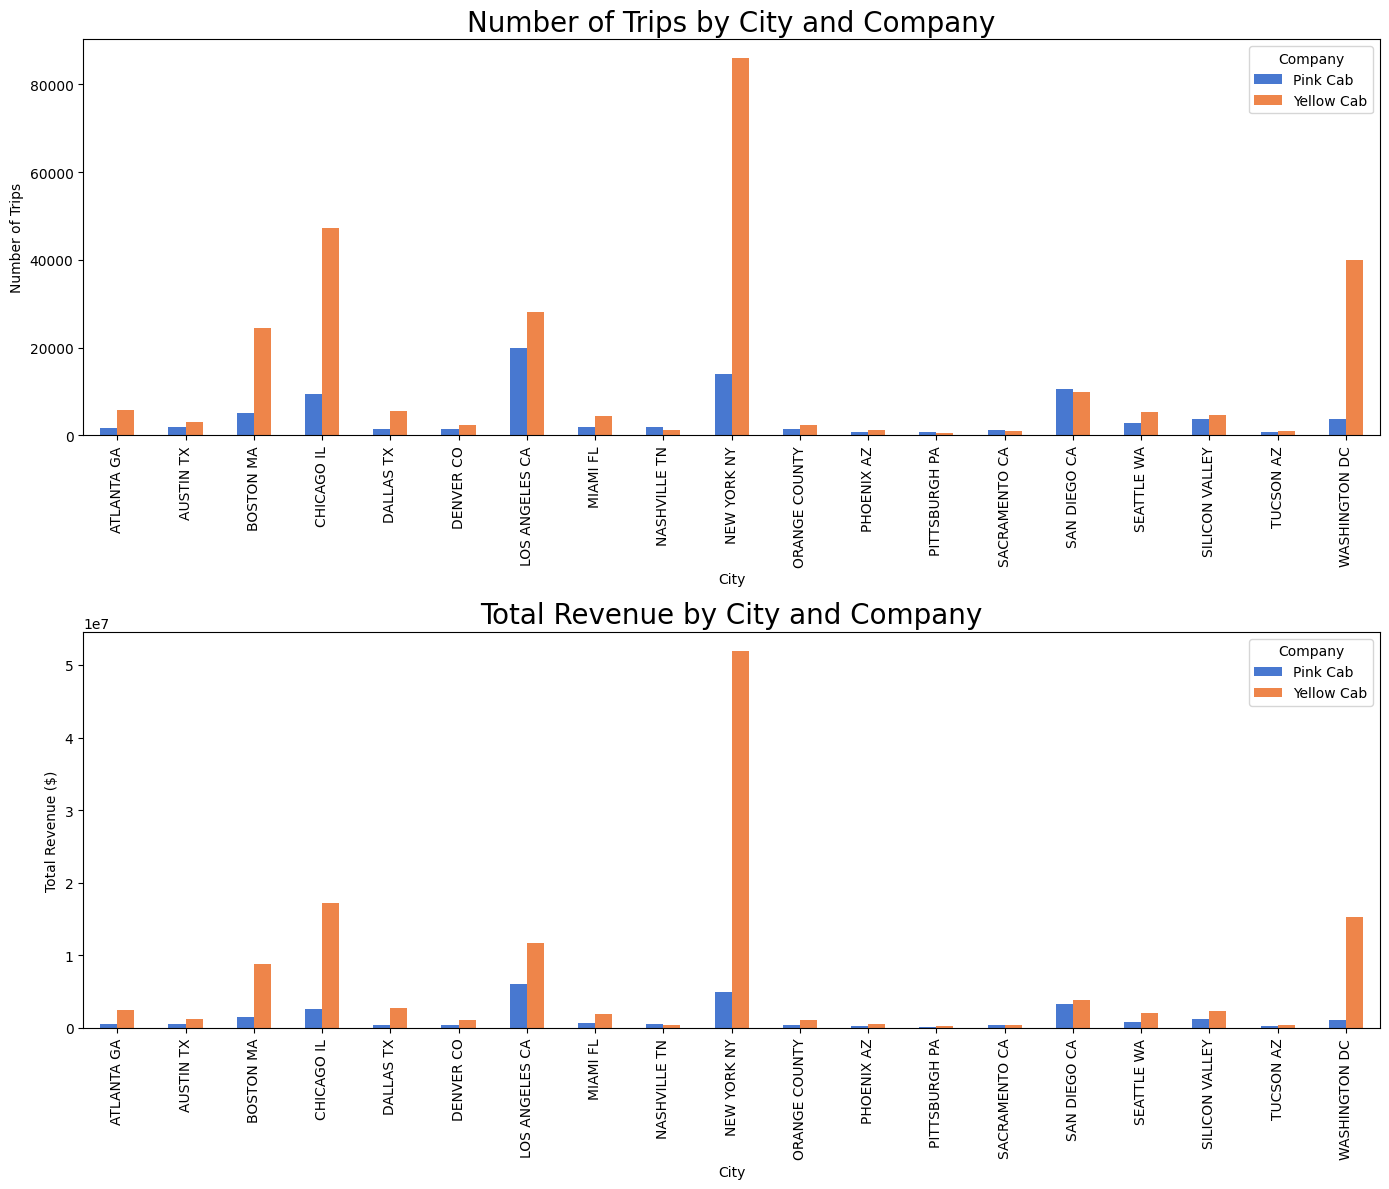

In [54]:
# Grouping data by city and company
city_trips = df.groupby(['City', 'Company'])['Transaction ID'].count().unstack()
city_revenue = df.groupby(['City', 'Company'])['Price Charged'].sum().unstack()

fig, ax = plt.subplots(2, 1, figsize=(14, 12))

city_trips.plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of Trips by City and Company', fontsize=20)
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('City')

# Plotting revenue by city
city_revenue.plot(kind='bar', ax=ax[1])
ax[1].set_title('Total Revenue by City and Company', fontsize=20)
ax[1].set_ylabel('Total Revenue ($)')
ax[1].set_xlabel('City')

plt.tight_layout()
plt.show()

> #### `Yellow Cab` is the leader in most cities in terms of the number of trips.
> #### `Yellow Cab` also generates more revenue in most cities.

### <h2> <font color = #90EE90> Average Price Charged per Trip by City </font> </h2>

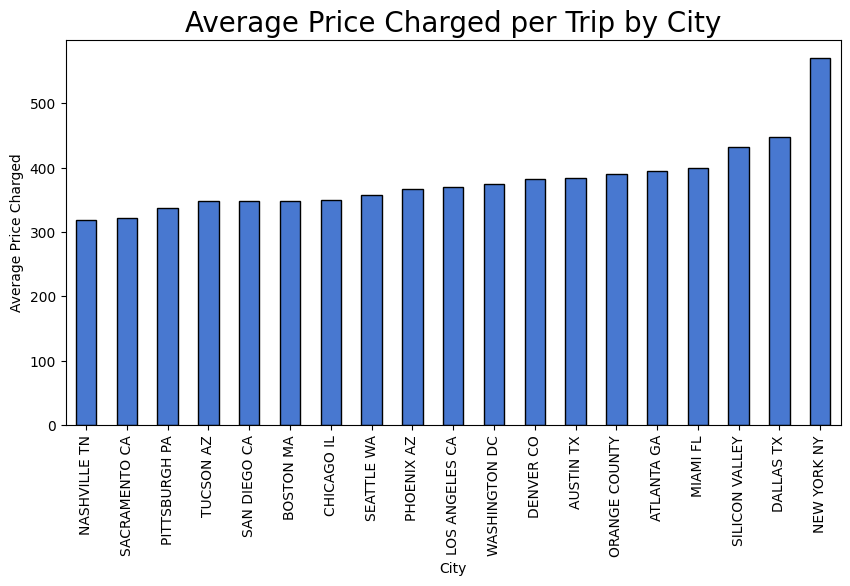

In [55]:
# Average price charged per trip by city
avg_price_city = df.groupby('City')['Price Charged'].mean().sort_values()

plt.figure(figsize=(10, 5))
avg_price_city.plot(kind='bar', edgecolor='black')
plt.title('Average Price Charged per Trip by City', fontsize=20)
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.show()

> #### There are differences in the average cost of trips between different cities.

### <h2> <font color = #90EE90> 3.5. __Additional insights from the data__: </font> </h2>

### <h2> <font color = #90EE90> Company popularity over Time </font> </h2>

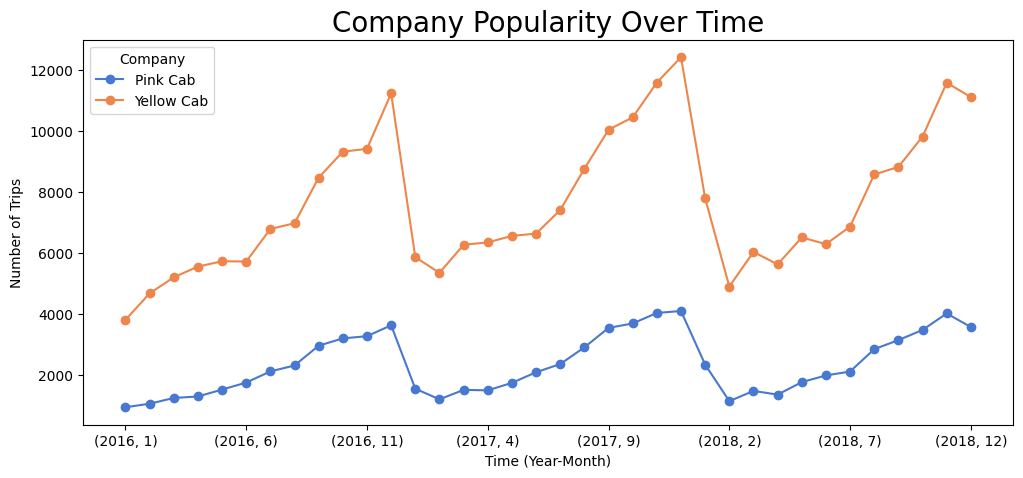

In [56]:
# Group by year, month, and company to count the number of transactions
company_monthly_usage = df.groupby(['Year', 'Month', 'Company']).size().reset_index(name='Number of Trips')

# Create a pivot table for better visualization
company_pivot = company_monthly_usage.pivot_table(index=['Year', 'Month'], columns='Company', values='Number of Trips', fill_value=0)

# Plot the company popularity over time
company_pivot.plot(kind='line', marker='o', figsize=(12,5))
plt.title('Company Popularity Over Time', fontsize=20)
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Trips')
plt.legend(title='Company')
plt.show()

> #### `Yellow Cab` generally has a higher number of trips compared to Pink Cab over time.

### <h2> <font color = #90EE90> Seasonality in Cab Usage </font> </h2>

In [57]:
# Group by year and month to count the number of transactions
monthly_usage = df.groupby(['Year', 'Month'])['Transaction ID'].count().reset_index(name='Number of Trips')

# Create a pivot table for better visualization
monthly_pivot = monthly_usage.pivot(index='Month', columns='Year', values='Number of Trips')

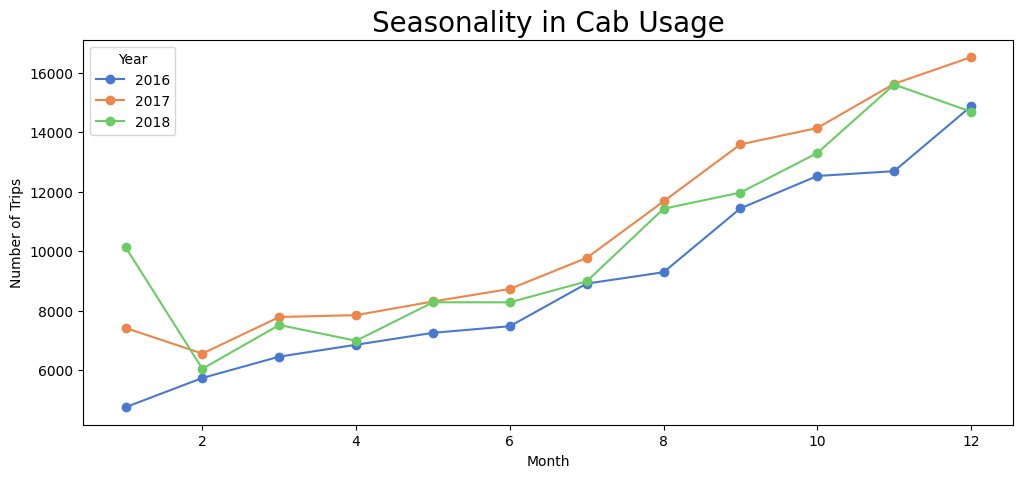

In [58]:
# Plot the seasonality)
monthly_pivot.plot(kind='line', marker='o', figsize=(12,5))
plt.title('Seasonality in Cab Usage', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.legend(title='Year')
plt.show()

> #### The seasonality analysis shows a clear trend in cab usage over the months. There are noticeable peaks and troughs, indicating that cab usage varies throughout the year.

# <font color = #32CD32> Part 4: Hypothesis Testing </font>

### <font color = #27C3E5> Hypothesis 1: </font> <font color = #32CD32> Is there any difference in Profit Based on Gender</font>
> <b>H0 :</b> There is no difference in profit regarding gender. <br><b>H1 :</b> There is a difference in profit regarding gender.

In [59]:
companies = ['Yellow Cab', 'Pink Cab']

In [79]:
for company in companies:
    print(f"\n{company}:")
    a = df[(df.Gender == 'Male') & (df.Company == company)]['Profit']
    b = df[(df.Gender == 'Female') & (df.Company == company)]['Profit']
    print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding profit by gender for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding profit by gender for {company}')


Yellow Cab:
size a: 158681, size b: 116000
t-statistic is 10.315494207195322
p-value is 6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference regarding profit by gender for Yellow Cab

Pink Cab:
size a: 47231, size b: 37480
t-statistic is 1.5754642478511207
p-value is 0.115153059004258
We accept null hypothesis (H0) that there is no difference regarding profit by gender for Pink Cab


> <b> `Yellow Cab`: There is a difference in profit regarding gender. </b>

> <b> `Pink Cab`: There is no difference in profit regarding gender. </b>

### <font color = #27C3E5> Hypothesis 2: </font> <font color = #32CD32> Is there any difference in Profit Based on Payment Mode</font>
> <b>H0 :</b> There is no difference in profit regarding payment mode. <br><b>H1 :</b> There is a difference in profit regarding payment mode.

In [80]:
for company in companies:
    print(f"\n{company}")
    a = df[(df.Payment_Mode == 'Cash') & (df.Company == company)]['Profit']
    b = df[(df.Payment_Mode == 'Card') & (df.Company == company)]['Profit']
    print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding profit by payment mode for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding profit by payment mode for {company}')


Yellow Cab
size a: 109896, size b: 164785
t-statistic is 1.050898652643264
p-value is 0.29330606382987284
We accept null hypothesis (H0) that there is no difference regarding profit by payment mode for Yellow Cab

Pink Cab
size a: 33992, size b: 50719
t-statistic is -0.26625096474899373
p-value is 0.7900465828793286
We accept null hypothesis (H0) that there is no difference regarding profit by payment mode for Pink Cab


> <b> `Yellow Cab`: There is no difference in profit regarding payment mode. </b>

> <b> `Pink Cab`: There is no difference in profit regarding payment mode. </b>

### <font color = #27C3E5> Hypothesis 3: </font> <font color = #32CD32> Is there any difference in Revenue Based on Age Group</font>
> <b>H0 :</b> There is no difference in revenue regarding age group. <br><b>H1 :</b> There is a difference in revenue regarding age group.

In [62]:
# Creating age groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [82]:
for company in companies:
    print(f"\n{company}")
    a = df[(df['Age Group'] == '20-30') & (df.Company == company)]['Price Charged']
    b = df[(df['Age Group'] == '30-40') & (df.Company == company)]['Price Charged']
    print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding revenue by age group for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding revenue by age group for {company}')


Yellow Cab
size a: 88163, size b: 86550
t-statistic is -0.8439046674773827
p-value is 0.3987238352474821
We accept null hypothesis (H0) that there is no difference regarding revenue by age group for Yellow Cab

Pink Cab
size a: 27203, size b: 26556
t-statistic is 0.85122795620289
p-value is 0.3946465277392325
We accept null hypothesis (H0) that there is no difference regarding revenue by age group for Pink Cab


> <b> `Yellow Cab`: There is no difference in revenue regarding age group. </b>

> <b> `Pink Cab`: There is no difference in revenue regarding age group. </b>

### <font color = #27C3E5> Hypothesis 4: </font> <font color = #32CD32> Is there any difference in Number of Trips Based on City</font>
> <b>H0 :</b> There is no difference in the number of trips regarding city. <br><b>H1 :</b> There is a difference in the number of trips regarding city.

In [64]:
cities = df['City'].unique()

In [84]:
for company in companies:
    print(f"\n{company}")
    trip_counts = [df[(df['City'] == city) & (df.Company == company)]['Transaction ID'].count() for city in cities]
    print(pd.Series(trip_counts).describe())

    t_stat, p_value = stats.f_oneway(*[df[(df['City'] == city) & (df.Company == company)]['Transaction ID'] for city in cities])
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding number of trips by city for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding number of trips by city for {company}')


Yellow Cab
count       19.000000
mean     14456.894737
std      22236.873289
min        631.000000
25%       1815.500000
50%       4722.000000
75%      17161.000000
max      85918.000000
dtype: float64
t-statistic is 22.553164620006115
p-value is 6.012869365786724e-75
We accept alternative hypothesis (H1) that there is a difference regarding number of trips by city for Yellow Cab

Pink Cab
count       19.000000
mean      4458.473684
std       5268.869174
min        682.000000
25%       1387.000000
50%       1868.000000
75%       4491.500000
max      19865.000000
dtype: float64
t-statistic is 9.321498670608708
p-value is 2.644230540081816e-26
We accept alternative hypothesis (H1) that there is a difference regarding number of trips by city for Pink Cab


> <b> `Yellow Cab`: There is a difference in the number of trips regarding city. </b>

> <b> `Pink Cab`: There is a difference in the number of trips regarding city. </b>

### <font color = #27C3E5> Hypothesis 5: </font> <font color = #32CD32> Is there any difference in Distance Travelled Based on Age Group</font>
> <b>H0 :</b> There is no difference in the distance travelled regarding age group. <br><b>H1 :</b> There is a difference in the distance travelled regarding age group.

In [86]:
for company in companies:
    print(f"\n{company}")
    a = df[(df['Age Group'] == '20-30') & (df.Company == company)]['KM Travelled']
    b = df[(df['Age Group'] == '30-40') & (df.Company == company)]['KM Travelled']
    print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding distance travelled by age group for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding distance travelled by age group for {company}')


Yellow Cab
size a: 88163, size b: 86550
t-statistic is -0.21982562866317218
p-value is 0.8260072158421701
We accept null hypothesis (H0) that there is no difference regarding distance travelled by age group for Yellow Cab

Pink Cab
size a: 27203, size b: 26556
t-statistic is 0.5696792188764248
p-value is 0.5688976678230542
We accept null hypothesis (H0) that there is no difference regarding distance travelled by age group for Pink Cab


> <b> `Yellow Cab`: There is no difference in the distance travelled regarding age group. </b>

> <b> `Pink Cab`: There is no difference in the distance travelled regarding age group. </b>

### <font color = #27C3E5> Hypothesis 6: </font> <font color = #32CD32> Is there any difference in Income of Customers Based on Company</font>
> <b>H0 :</b> There is no difference in the income of customers regarding the cab company. <br><b>H1 :</b> There is a difference in the income of customers regarding the cab company.

In [67]:
a = df[df['Company'] == 'Yellow Cab']['Income (USD/Month)']
b = df[df['Company'] == 'Pink Cab']['Income (USD/Month)']
print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")


t_stat, p_value = stats.ttest_ind(a.values, b.values, equal_var=True)
print(f"t-statistic is {t_stat}")
print(f"p-value is {p_value}")

alpha = 0.05 # significance level

if p_value < alpha:
    print('We accept alternative hypothesis (H1) that there is a difference in the income of customers between the companies')
else:
    print('We accept null hypothesis (H0) that there is no difference in the income of customers between the companies')

size a: 274681, size b: 84711
t-statistic is -0.42711269788899964
p-value is 0.6692975005750659
We accept null hypothesis (H0) that there is no difference in the income of customers between the companies


> <b> There is no difference in the income of customers regarding the cab company. </b>

### <font color = #27C3E5> Hypothesis 7: </font> <font color = #32CD32> Is there any difference in Distance Travelled Based on Gender</font>
> <b>H0 :</b> There is no difference in the distance travelled regarding gender. <br><b>H1 :</b> There is a difference in the distance travelled regarding gender.

In [88]:
for company in companies:
    print(f"\n{company}")
    a = df[(df.Gender == 'Male') & (df.Company == company)]['KM Travelled']
    b = df[(df.Gender == 'Female') & (df.Company == company)]['KM Travelled']
    print(f"size a: {a.shape[0]}, size b: {b.shape[0]}")

    t_stat, p_value = stats.ttest_ind(a.values, b.values)
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference regarding the distance travelled by gender for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference regarding the distance travelled by gender for {company}')


Yellow Cab
size a: 158681, size b: 116000
t-statistic is -0.651591243962616
p-value is 0.5146654429411317
We accept null hypothesis (H0) that there is no difference regarding the distance travelled by gender for Yellow Cab

Pink Cab
size a: 47231, size b: 37480
t-statistic is -0.5008718498401431
p-value is 0.6164626165258722
We accept null hypothesis (H0) that there is no difference regarding the distance travelled by gender for Pink Cab


> <b> `Yellow Cab`: There is no difference in the distance travelled regarding gender. </b>

> <b> `Pink Cab`: There is no difference in the distance travelled regarding gender. </b>

### <font color = #27C3E5> Hypothesis 8: </font> <font color = #32CD32> Is there any difference in Average Price Charged per Trip by City</font>
> <b>H0 :</b> There is no difference in Average Price Charged per Trip regarding City. <br><b>H1 :</b> There is a difference in in Average Price Charged per Trip regarding City.

In [90]:
for company in companies:
    print(f"\n{company}")
    average_price_per_trip_by_city = [df[(df.Company == company) & (df.City == city)]['Price Charged'].mean() for city in cities]
    print(pd.Series(average_price_per_trip_by_city))

    t_stat, p_value = stats.f_oneway(*[df[(df.Company == company) & (df.City == city)]['Price Charged'] for city in cities])
    print(f"t-statistic is {t_stat}")
    print(f"p-value is {p_value}")

    alpha = 0.05 # significance level

    if p_value < alpha:
        print(f'We accept alternative hypothesis (H1) that there is a difference in Average Price Charged per Trip regarding City for {company}')
    else:
        print(f'We accept null hypothesis (H0) that there is no difference in Average Price Charged per Trip regarding City for {company}')


Yellow Cab
0     422.413446
1     422.248940
2     359.140431
3     364.021927
4     493.807790
5     443.235413
6     416.231136
7     432.944872
8     376.245577
9     604.841911
10    438.548623
11    428.737417
12    405.313661
13    362.637106
14    392.223328
15    391.014733
16    506.499502
17    366.018224
18    381.051261
dtype: float64
t-statistic is 2240.8998127101095
p-value is 0.0
We accept alternative hypothesis (H1) that there is a difference in Average Price Charged per Trip regarding City for Yellow Cab

Pink Cab
0     302.131555
1     320.435070
2     300.551489
3     281.613731
4     260.025652
5     276.202453
6     305.624252
7     326.006309
8     282.062493
9     357.074129
10    312.026874
11    280.321458
12    273.879355
13    290.110810
14    307.938193
15    291.223898
16    340.377008
17    323.213554
18    299.974561
dtype: float64
t-statistic is 91.96667541583189
p-value is 0.0
We accept alternative hypothesis (H1) that there is a difference in Average 

> <b> `Yellow Cab`: There is a difference in Average Price Charged per Trip regarding City. </b>

> <b> `Pink Cab`: There is a difference in Average Price Charged per Trip regarding City. </b>

# <font color = #32CD32> Part 5: Recommendation </font>

## Based on the analysis, the following conclusions can be drawn:

#### 1. __Overall Company Performance__: Yellow Cab has __`higher performance in all key parameters`__ compared to Pink Cab:
* #### number of trips (+224.1% more than Pink Cab),
* #### total revenue (+378.1% more than Pink Cab),
* #### total costs (+289.4% more than Pink Cab),
* #### and most importantly, profit (729.4% more than Pink Cab, or 8.29 times more).

#### 2. __Average Performance Per Trip__: Yellow Cab __`generates more profit per trip__`, despite higher costs, which makes investments in Yellow Cab more attractive in terms of profitability:
* #### average revenue per trip (+47.4% more than Pink Cab),
* #### average costs per trip (+20.0% more than Pink Cab:),
* #### average profit per trip (+155.8% more than Pink Cab, or 2.5 times more).


#### 3. __Customer Base__: Both companies have a similar distribution by age and gender of customers, however, Yellow Cab customers have a __`slightly higher median income`__.

#### 4. __Geographical Distribution__: Yellow Cab __`leads in most cities in terms of number of trips and revenue`__, which shows wider market coverage and potential for further growth.

#### 5. __Seasonal Trends__: Both companies show seasonal fluctuations, but Yellow Cab __`shows more stable growth`__.

# <font color = #32CD32> Based on the above conclusions, investing in `Yellow Cab` seems to be a more reasonable and promising decision compared to Pink Cab. </font>